# Data cleaning practice: Africa LinkedIn Jobs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns
import plotly
import random

In [2]:
data = 'linkedin-jobs-africa.csv'

df = pd.read_csv(data)

In [3]:
df.shape

(2872, 9)

In [4]:
df.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link'],
      dtype='object')

In [5]:
df.dtypes

title             object
company           object
description       object
onsite_remote     object
salary           float64
location          object
criteria          object
posted_date       object
link              object
dtype: object

In [6]:
df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,NaN,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,NaN,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...


## Grouping job positions by profession

These will be grouped in 4 professions
* Data Analyst
* Data Engineer
* Data Scientist
* Business Intelligence Analyst

In [7]:
#See the unique values of the job positons. Later, will be grouped manually
df['title'].unique()

array(['Data Analyst', 'Data Analyst (Credit Risk)',
       'Data Analyst - Junior', 'Junior Data Analyst',
       'Data Analyst Graduate', 'Data analyst / SQL Developer',
       'Group Data Analyst', 'Junior Data Engineer', 'Data Engineer',
       'Hubspot Data Analyst', 'Business Data Analyst',
       'Data Analyst JHB', 'CV Data Engineer - CDA',
       'Supply Chain Data MGT Analyst, AMET (Short-term)',
       'Data Analyst At IITA (Tamale)', 'Data Engineer at Youverify',
       'Market Data Analyst', 'Regional Data Analyst',
       'People Data Analyst at SA Taxi Development Finance',
       'Data Analyst at Datonomy Solutions', 'Specialist: Data Analytics',
       'Data Analyst (JHB)', 'Data Analyst H.F',
       'Data Engineer Intern - Machine learning', 'Analytics Specialist',
       'Insight Analyst / Data Analyst', 'BI Analyst',
       'Data Quality Analyst', 'BI Specialist At Vodafone Ghana',
       'Analyst, Data Science', 'Data Engineer/',
       'Business Intelligence Consu

In [8]:
#Grouping with replace() to 'Data Analyst'

df['title'].replace([
    'Data Analyst (Credit Risk)',
    'Data Analyst - Junior',
    'Analytics Specialist',
    'Junior Data Analyst',
    'Data Analyst Graduate', 
    'Data analyst / SQL Developer',
    'Group Data Analyst',
    'Hubspot Data Analyst', 
    'Business Data Analyst',
    'Data Analyst JHB',
    'Supply Chain Data MGT Analyst, AMET (Short-term)',
    'Data Analyst At IITA (Tamale)',
    'Market Data Analyst', 
    'Regional Data Analyst',
    'People Data Analyst at SA Taxi Development Finance',
    'Data Analyst at Datonomy Solutions', 
    'Specialist: Data Analytics',
    'Data Analyst (JHB)', 
    'Data Analyst H.F',
    'Insight Analyst / Data Analyst', 
    'BI Analyst',
    'Data Quality Analyst', 
    'BI Specialist At Vodafone Ghana',
    'Senior Data Analyst',
    'Data Analyst (Fraud Division)', 
    'DATA ANALYST',
    'Data Analyst (Global Remote)',
    'Data Analyst, Forward Kitchens (Remote) - $60,000/year USD',
    'Python Data Analyst (Remote)',
    'People Data Analyst', 'Reference Data Analyst',
    'Data Analyst, Trilogy (Remote) - $60,000/year USD',
    'IDM Data Analyst',
    'Remote Data Analyst Jobs',
    'International consultant - Data analysis and Monitoring, Mogadishu, Somalia, 6 months [home based]',
    'Global Business Data Analyst',
    'Clinical Data Analyst (FSP), South Africa',
    'Remote Data Analyst/Engineer Jobs',
    'Data Customer Analyst',
    'Commercial Data Analyst', 
    'Reporting and Data Analyst',
    'Data Analyst/Developer', 
    'Forensics Data Analyst',
    'Data Intelligence Analyst', 
    'Data Analyst (Power BI & Python/R)',
    'Data Analyst (H/F)', 
    'Data Analysis and Data Expert',
    'Web Data Analyst', 
    'ETL and Data Quality Analyst',
    'Data Entry and Research Analyst', 
    'HR Data Analyst',
    'Finance Data Analyst',
    'Merchandise Data Analyst (Fashion Retail)', 
    'Insights Analyst'], 
    
    'Data Analyst', inplace=True)

In [9]:
#Grouping with replace to 'Data Engineer'

df['title'].replace([
    'Junior Data Engineer', 
    'Data Engineer',
    'CV Data Engineer - CDA', 
    'Data Engineer at Youverify',
    'Data Engineer Intern - Machine learning',
    'Data Engineer/',
    'Junior / Graduate Data Engineer',
    'Data Engineer (Remote)',
    'Data Engineer (REMOTE)', 
    'Data Engineer (Contract)'],
  
    'Data Engineer', inplace=True)

In [10]:
#Grouping with replace() to 'Data Scientist'

df['title'].replace(
    'Analyst, Data Science', 
    
    'Data Scientist', inplace=True)

In [11]:
#Grouping with replace to 'Business Intelligence' (BI Analyst)

df['title'].replace([
    'Business Intelligence Consultant', 
    'BI Data Analyst (Contract)',
    'BI Researcher',
    'BI Data Analyst'],
    
    'Business Inteligence', inplace=True)

In [12]:
#This is how it would look
print(df['title'].unique())

['Data Analyst' 'Data Engineer' 'Data Scientist' 'Business Inteligence']


In [13]:
df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
2,Data Analyst,Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,NaN,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,NaN,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...


In [14]:
#Verify NaN values in the ['salary'] column. There are not NaN values
nan_values = df['salary'].isna()
print(nan_values.unique())

[ True]


In [15]:
#Delete not relevant columns
df.drop(columns=['description', 'link', 'criteria'], inplace=True)

In [16]:
df.head()

,title,company,onsite_remote,salary,location,posted_date
0,Data Analyst,NNC,onsite,NaN,"Cairo, Cairo, Egypt",2022-11-18
1,Data Analyst,Watu Credit,onsite,NaN,"Nairobi County, Kenya",2022-11-01
2,Data Analyst,Kuda,onsite,NaN,"Cape Town, Western Cape, South Africa",2022-11-21
3,Data Analyst,Watu Credit,onsite,NaN,"Nairobi, Nairobi County, Kenya",2022-11-01
4,Data Analyst,Tata Consultancy Services,onsite,NaN,"City of Johannesburg, Gauteng, South Africa",2022-10-27


In [17]:
#Generate a random numbers for each row between 82.000 and 134.000, then, round to 0 decimals
random_numbers_salary = [round(random.uniform(82000, 134000)) for _ in range(len(df))]

#Fill the ['salary'] column with random numbers in each row
df['salary'].fillna(pd.Series(random_numbers_salary), inplace=True)

In [18]:
df.head()

,title,company,onsite_remote,salary,location,posted_date
0,Data Analyst,NNC,onsite,122490.0,"Cairo, Cairo, Egypt",2022-11-18
1,Data Analyst,Watu Credit,onsite,98696.0,"Nairobi County, Kenya",2022-11-01
2,Data Analyst,Kuda,onsite,130712.0,"Cape Town, Western Cape, South Africa",2022-11-21
3,Data Analyst,Watu Credit,onsite,121281.0,"Nairobi, Nairobi County, Kenya",2022-11-01
4,Data Analyst,Tata Consultancy Services,onsite,111755.0,"City of Johannesburg, Gauteng, South Africa",2022-10-27


In [19]:
#This verifies the nulls in each column, its 'False' in 2872 rows, that means, the size of the dataframe. There are no null values

title_nulls = df['title'].isnull()
company_nulls = df['company'].isnull()
job_type_nulls = df['onsite_remote'].isnull()
salary_nulls = df['salary'].isnull()
location_nulls = df['location'].isnull()
posted_date_nulls = df['posted_date'].isnull()

#Store all column variables in a variable
columns_list = [title_nulls, company_nulls, job_type_nulls, salary_nulls, location_nulls, posted_date_nulls]

#Print the value counts of each column
for column in columns_list:
    print(f"\n{column.value_counts()}")

print(f"\n\nThe size of the Dataframe is: {df.shape}. No nulls registered")


title
False    2872
Name: count, dtype: int64

company
False    2872
Name: count, dtype: int64

onsite_remote
False    2872
Name: count, dtype: int64

salary
False    2872
Name: count, dtype: int64

location
False    2872
Name: count, dtype: int64

posted_date
False    2872
Name: count, dtype: int64


The size of the Dataframe is: (2872, 6). No nulls registered


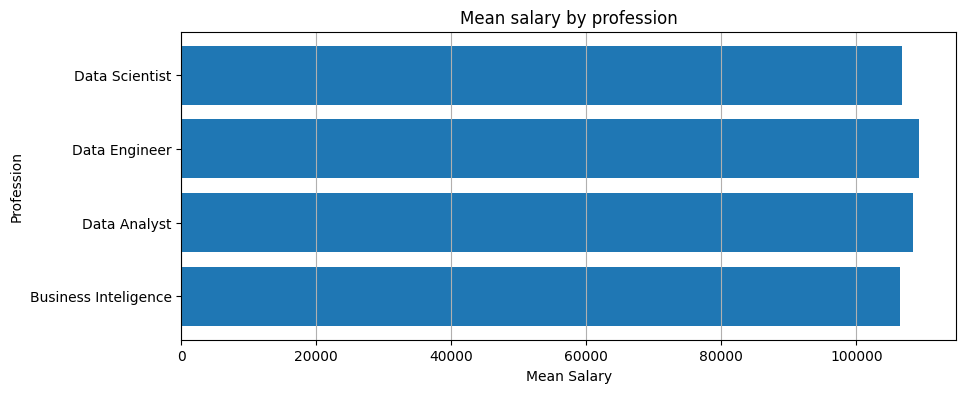

In [20]:
#This groups for job position and calculates the mean salary of each job positon/profession

salaries_profession = df.groupby('title')['salary'].mean()

plt.figure(figsize=(10, 4))

plt.barh(salaries_profession.index, salaries_profession.values)
plt.xlabel('Mean Salary')
plt.ylabel('Profession')
plt.title('Mean salary by profession')
ticks = plt.xticks()
plt.grid(axis='x')

plt.show()

In [21]:
#This line of code converts the first letter to uppercase, counts the quantity of values for each job modality, and sorts the values for the next graph

job_type = df['onsite_remote'].str.capitalize().value_counts().sort_values()

job_type

onsite_remote
Remote    950
Hybrid    950
Onsite    972
Name: count, dtype: int64

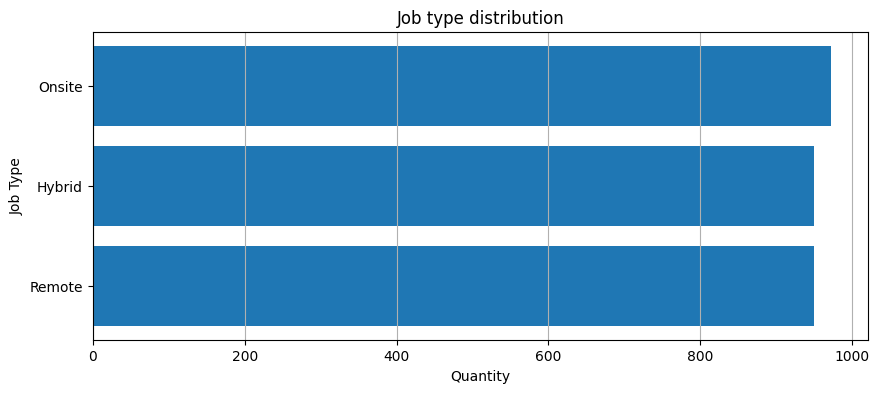

In [44]:
#Graph with the job_type variable (explained previously)
plt.figure(figsize=(10, 4))

plt.barh(job_type.index, job_type.values)
plt.xlabel('Quantity')
plt.ylabel('Job Type')
plt.title('Job type distribution')
ticks = plt.xticks()
plt.grid(axis='x')

plt.show()

In [23]:
#Do the same with location, grouping each one in Countries
print(df['location'].unique())

['Cairo, Cairo, Egypt' 'Nairobi County, Kenya'
 'Cape Town, Western Cape, South Africa' 'Nairobi, Nairobi County, Kenya'
 'City of Johannesburg, Gauteng, South Africa' 'Giza, Al Jizah, Egypt'
 'South East, South-East District, Botswana'
 'Dakar, Dakar Region, Senegal'
 'Nzalae/ Nzawa locations, Kitui County, Kenya'
 'Johannesburg, Gauteng, South Africa' 'Centurion, Gauteng, South Africa'
 'Sousse, Sousse, Tunisia' 'Rustenburg, North-West, South Africa'
 'South-East District, Botswana'
 'Munya Gen, North Bank Division, The Gambia'
 '6th of October, Al Jizah, Egypt' 'Ghana' 'Lagos, Lagos State, Nigeria'
 'East London, Eastern Cape, South Africa'
 'Kempton Park, Gauteng, South Africa' 'Midrand, Gauteng, South Africa'
 'Préfecture de Fès, Fès-Meknès, Morocco'
 'Randburg, Gauteng, South Africa' 'Pretoria, Gauteng, South Africa'
 'Prefecture of Casablanca, Casablanca-Settat, Morocco'
 'Casablanca, Casablanca-Settat, Morocco' 'Southwest, Burkina Faso'
 'Accra, Greater Accra Region, Ghana' 'Eg

## Grouping all locations per country manually
These will be grouped in Countries: 
* Egypt
* Kenya
* South Africa
* Botswana
* Senegal
* Tunisia
* Gambia
* Ghana
* Nigeria
* Morocco
* Burkina Faso
* Eastern Africa
* Mali
* Zimbabwe


In [24]:
df['location'].replace([
    'Nairobi, Nairobi County, Kenya',
    'Nairobi County, Kenya',
    'Nzalae/ Nzawa locations, Kitui County, Kenya',
    'Kenya',
    ],
    
    'Kenia', inplace=True
)

In [25]:
df['location'].replace([
    'Cape Town, Western Cape, South Africa',
    'City of Johannesburg, Gauteng, South Africa',
    'Johannesburg, Gauteng, South Africa',
    'Centurion, Gauteng, South Africa',
    'Rustenburg, North-West, South Africa',
    'East London, Eastern Cape, South Africa',
    'Kempton Park, Gauteng, South Africa',
    'Midrand, Gauteng, South Africa',
    'Randburg, Gauteng, South Africa',
    'Pretoria, Gauteng, South Africa',
    'Gauteng, South Africa',
    'Sandton, Gauteng, South Africa',
    'Western Cape, South Africa',
    'Johannesburg Metropolitan Area'],
    
    'South Africa', inplace=True
)

In [26]:
df['location'].replace([
    'South East, South-East District, Botswana',
    'South-East District, Botswana',
    ],
                       
'Botswana', inplace=True
)

In [27]:
df['location'].replace(
    'Lagos, Lagos State, Nigeria', 
    
    'Nigeria', inplace=True)

In [28]:
df['location'].replace(
    'Dakar, Dakar Region, Senegal', 
    
    'Senegal', inplace=True)

In [29]:
df['location'].replace(
    'Accra, Greater Accra Region, Ghana', 
    
    'Ghana', inplace=True)

In [30]:
df['location'].replace(
    'Munya Gen, North Bank Division, The Gambia', 
    
    'Gambia', inplace=True)

In [31]:
df['location'].replace(
    'Southwest, Burkina Faso', 
    
    'Burkina Faso', inplace=True)

In [32]:
df['location'].replace([
    'Cairo, Egypt', 
    'Giza, Al Jizah, Egypt', 
    'Cairo, Cairo, Egypt', 
    '6th of October, Al Jizah, Egypt'
    ], 
                       
    'Egypt', inplace=True)

In [33]:
df['location'].replace(
    'Marondera, Mashonaland East Province, Zimbabwe', 
    
    'Zimbabwe', inplace=True)

In [34]:
df['location'].replace([
    'Sousse, Sousse, Tunisia', 
    'Tunis, Tunis, Tunisia'
    ],
    
    'Tunisia', inplace=True)

In [35]:
df['location'].replace(
    'Bamako, Bamako, Mali', 
    
    'Mali', inplace=True)

In [36]:
df['location'].replace([
    'Préfecture de Fès, Fès-Meknès, Morocco',
    'Prefecture of Casablanca, Casablanca-Settat, Morocco',
     'Casablanca, Casablanca-Settat, Morocco',
     'Mechouar, Casablanca-Settat, Morocco',
    ],
    
    'Morocco', inplace=True)

In [37]:
#Final result:

print(df['location'].unique())

['Egypt' 'Kenia' 'South Africa' 'Botswana' 'Senegal' 'Tunisia' 'Gambia'
 'Ghana' 'Nigeria' 'Morocco' 'Burkina Faso' 'Eastern Africa' 'Mali'
 'Zimbabwe']


In [38]:
#Verify NaN values in the ['location'] column
nan_location = df['location'].isna()
print(nan_location.unique())

[False]


In [39]:
df.head()

,title,company,onsite_remote,salary,location,posted_date
0,Data Analyst,NNC,onsite,122490.0,Egypt,2022-11-18
1,Data Analyst,Watu Credit,onsite,98696.0,Kenia,2022-11-01
2,Data Analyst,Kuda,onsite,130712.0,South Africa,2022-11-21
3,Data Analyst,Watu Credit,onsite,121281.0,Kenia,2022-11-01
4,Data Analyst,Tata Consultancy Services,onsite,111755.0,South Africa,2022-10-27


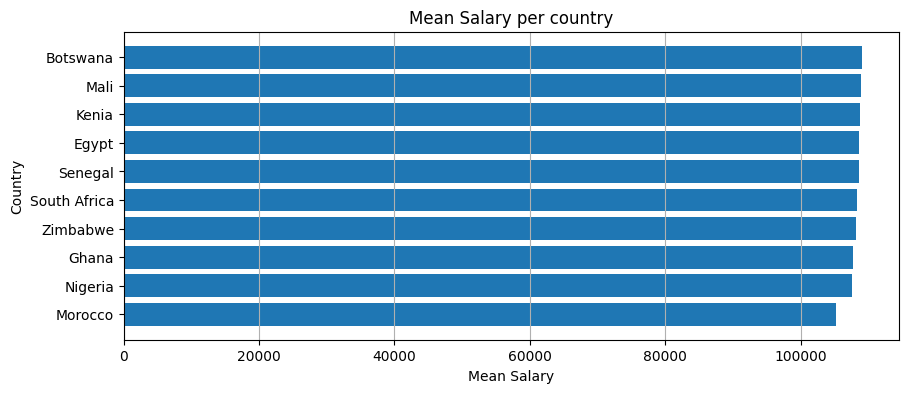

In [40]:
#Groups the mean salary per location, orts the values in descending order, and then limit the amount that will be shown to 10
graph = df.groupby('location')['salary'].mean().sort_values()[:10]

plt.figure(figsize=(10, 4))
plt.barh(graph.index, graph.values)
plt.xlabel('Mean Salary')
plt.ylabel('Country')
plt.title('Mean Salary per country')
plt.grid(axis='x')
ticks = plt.xticks()

plt.show()

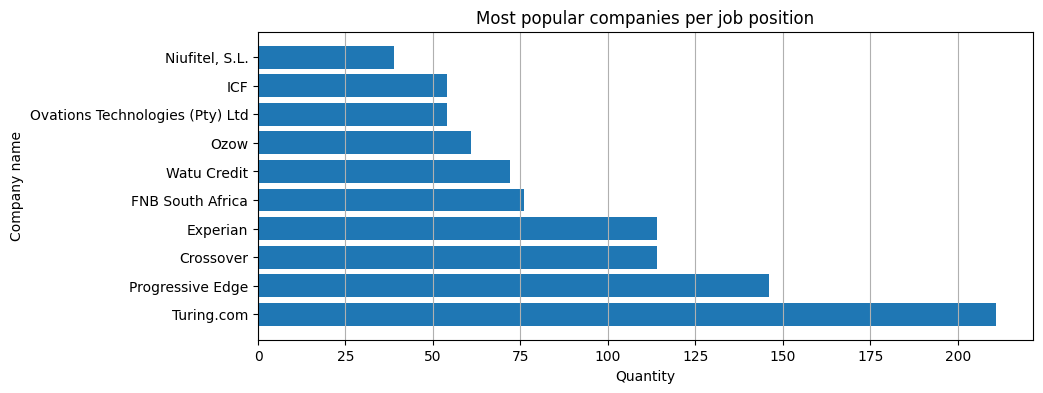

In [41]:
#Groups and counts how many professionals of each job positions are in each company, sorts the values in descending order and then limit the amount that will be shown to 10
companies = df.groupby('company')['title'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 4))
plt.barh(companies.index, companies.values)
plt.xlabel('Quantity')
plt.ylabel('Company name')
plt.title('Most popular companies per job position')
plt.grid(axis='x')

plt.show()


In [42]:
#Vefify NaN values in the ['posted_date'] column
nan_dates = df['posted_date'].isna().any()

nan_dates

False

In [43]:
print(df['posted_date'].unique())

['2022-11-18' '2022-11-01' '2022-11-21' '2022-10-27' '2022-11-10'
 '2022-11-22' '2022-11-23' '2022-10-24' '2022-09-18' '2022-10-22'
 '2022-11-16' '2022-10-19' '2022-11-04' '2022-10-17' '2022-11-12'
 '2022-11-08' '2022-11-14' '2022-10-13' '2022-11-17' '2022-11-09'
 '2022-08-28' '2022-10-05' '2022-10-12' '2022-10-29' '2022-10-04'
 '2022-10-25' '2022-10-15' '2022-11-15' '2022-11-20' '2022-10-18'
 '2022-10-03' '2022-11-07' '2022-11-11' '2022-11-03' '2022-10-23'
 '2022-11-13' '2022-10-20']
